In [72]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
data = pd.read_csv('CDMX.csv') 

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26281 non-null  int64  
 1   listing_url                                   26281 non-null  object 
 2   scrape_id                                     26281 non-null  int64  
 3   last_scraped                                  26281 non-null  object 
 4   source                                        26281 non-null  object 
 5   name                                          26281 non-null  object 
 6   description                                   25513 non-null  object 
 7   neighborhood_overview                         15110 non-null  object 
 8   picture_url                                   26281 non-null  object 
 9   host_id                                       26281 non-null 

In [75]:
valores_nulos=data.isnull().sum()
valores_nulos

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3296
Length: 75, dtype: int64

In [76]:
data['price'] = (data['price'].replace('[\$,]', '', regex=True)).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_39501/360583944.py:1: SyntaxWarning: invalid escape sequence '\$'
  data['price'] = (data['price'].replace('[\$,]', '', regex=True)).astype(float)


eliminar nulos

In [77]:
cuantitativas = data.select_dtypes(include=["float64", "int64"])
cualitativas = data.select_dtypes(include=["object"])

In [78]:
cuantitativas = cuantitativas.fillna(cuantitativas.mean())
cualitativas = cualitativas.fillna("Desconocido")

In [79]:
data1 = pd.concat([cuantitativas, cualitativas], axis=1)

In [80]:
valores_nulos=data1.isnull().sum()
valores_nulos

id                           0
scrape_id                    0
host_id                      0
host_listings_count          0
host_total_listings_count    0
                            ..
has_availability             0
calendar_last_scraped        0
first_review                 0
last_review                  0
instant_bookable             0
Length: 75, dtype: int64

<Figure size 10000x10000 with 0 Axes>

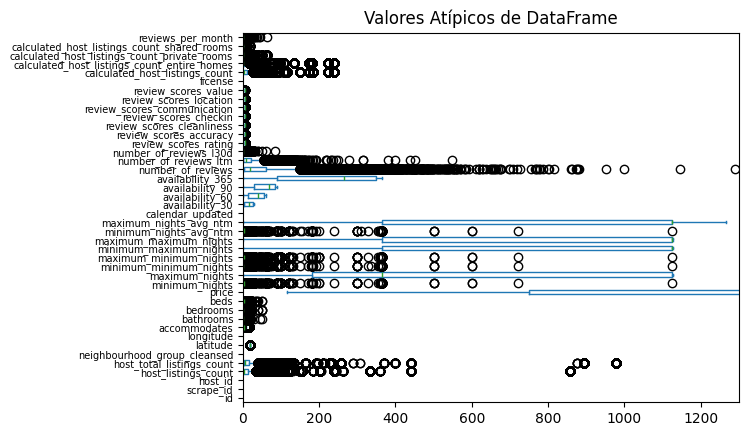

In [81]:
fig = plt.figure(figsize = (100,100))
cuantitativas.plot(kind='box', vert=False)
plt.xlim([0, 1300])
plt.title('Valores Atípicos de DataFrame')
plt.yticks(fontsize=7, rotation=0)
plt.show()

In [82]:
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)


Limite superior permitido id                                              2.600145e+18
scrape_id                                       2.024123e+13
host_id                                         8.860262e+08
host_listings_count                             3.350000e+01
host_total_listings_count                       3.950000e+01
neighbourhood_group_cleansed                             NaN
latitude                                        1.949298e+01
longitude                                      -9.911830e+01
accommodates                                    7.000000e+00
bathrooms                                       2.250000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
price                                           3.707040e+03
minimum_nights                                  3.500000e+00
maximum_nights                                  2.542500e+03
minimum_minimum_nights                          3.500000e+0

In [83]:
data2_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2_iqr

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,20241227033128,153786,1.0,1.0,NaN,19.382830,NaN,2.0,1.000000,...,4.839246,4.82579,4.84198,4.718538,NaN,1.0,1.0,0.0,0.0,1.803403
1,44616,20241227033128,196253,12.0,13.0,NaN,19.411620,-99.177940,NaN,NaN,...,4.870000,4.78000,4.98000,4.480000,NaN,8.0,4.0,1.0,0.0,0.400000
2,67703,20241227033128,334451,3.0,4.0,NaN,19.411520,-99.168570,4.0,1.000000,...,4.940000,4.92000,4.98000,4.920000,NaN,2.0,2.0,0.0,0.0,0.310000
3,70644,20241227033128,212109,3.0,4.0,NaN,19.354480,-99.162170,2.0,1.000000,...,4.960000,4.98000,4.96000,4.920000,NaN,3.0,2.0,1.0,0.0,0.840000
4,131610,20241227033128,647454,3.0,4.0,NaN,19.354160,-99.164880,2.0,1.470881,...,4.839246,4.82579,4.84198,4.718538,NaN,3.0,1.0,2.0,0.0,1.803403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,20241227033128,369403303,13.0,16.0,NaN,19.436998,-99.196733,2.0,1.000000,...,4.839246,4.82579,4.84198,4.718538,NaN,12.0,0.0,NaN,0.0,1.803403
26277,1318960023050066631,20241227033128,525554527,NaN,NaN,NaN,19.449230,-99.136170,3.0,1.000000,...,4.839246,4.82579,4.84198,4.718538,NaN,1.0,1.0,0.0,0.0,1.803403
26278,1318997244771691320,20241227033128,293574406,8.0,8.0,NaN,NaN,NaN,6.0,2.000000,...,4.839246,4.82579,4.84198,4.718538,NaN,8.0,0.0,5.0,NaN,1.803403
26279,1319078571963617776,20241227033128,35255741,NaN,NaN,NaN,19.400096,-99.172981,NaN,NaN,...,4.839246,4.82579,4.84198,4.718538,NaN,NaN,NaN,0.0,0.0,1.803403


In [84]:
valores_nulos=data2_iqr.isnull().sum()
valores_nulos

id                                                  0
scrape_id                                           0
host_id                                             0
host_listings_count                              3521
host_total_listings_count                        3696
neighbourhood_group_cleansed                    26281
latitude                                         1812
longitude                                        2843
accommodates                                     1320
bathrooms                                        2277
bedrooms                                          860
beds                                             2312
price                                            1907
minimum_nights                                   3523
maximum_nights                                      0
minimum_minimum_nights                           3065
maximum_minimum_nights                           1964
minimum_maximum_nights                              0
maximum_maximum_nights      

In [85]:
data3_iqr=data2_iqr.copy()
data3_iqr=data2_iqr.fillna(round(data2_iqr.mean(),1))
data3_iqr

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,20241227033128,153786,1.0,1.0,NaN,19.382830,-99.200000,2.0,1.000000,...,4.839246,4.82579,4.84198,4.718538,NaN,1.0,1.0,0.0,0.0,1.803403
1,44616,20241227033128,196253,12.0,13.0,NaN,19.411620,-99.177940,3.0,1.300000,...,4.870000,4.78000,4.98000,4.480000,NaN,8.0,4.0,1.0,0.0,0.400000
2,67703,20241227033128,334451,3.0,4.0,NaN,19.411520,-99.168570,4.0,1.000000,...,4.940000,4.92000,4.98000,4.920000,NaN,2.0,2.0,0.0,0.0,0.310000
3,70644,20241227033128,212109,3.0,4.0,NaN,19.354480,-99.162170,2.0,1.000000,...,4.960000,4.98000,4.96000,4.920000,NaN,3.0,2.0,1.0,0.0,0.840000
4,131610,20241227033128,647454,3.0,4.0,NaN,19.354160,-99.164880,2.0,1.470881,...,4.839246,4.82579,4.84198,4.718538,NaN,3.0,1.0,2.0,0.0,1.803403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,20241227033128,369403303,13.0,16.0,NaN,19.436998,-99.196733,2.0,1.000000,...,4.839246,4.82579,4.84198,4.718538,NaN,12.0,0.0,0.7,0.0,1.803403
26277,1318960023050066631,20241227033128,525554527,6.2,7.4,NaN,19.449230,-99.136170,3.0,1.000000,...,4.839246,4.82579,4.84198,4.718538,NaN,1.0,1.0,0.0,0.0,1.803403
26278,1318997244771691320,20241227033128,293574406,8.0,8.0,NaN,19.400000,-99.200000,6.0,2.000000,...,4.839246,4.82579,4.84198,4.718538,NaN,8.0,0.0,5.0,0.0,1.803403
26279,1319078571963617776,20241227033128,35255741,6.2,7.4,NaN,19.400096,-99.172981,3.0,1.300000,...,4.839246,4.82579,4.84198,4.718538,NaN,5.0,2.4,0.0,0.0,1.803403


In [86]:
Datos_limpios_cdmx = pd.concat([cualitativas, data3_iqr], axis=1)
Datos_limpios_cdmx

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/35797,2024-12-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,...,4.839246,4.82579,4.84198,4.718538,NaN,1.0,1.0,0.0,0.0,1.803403
1,https://www.airbnb.com/rooms/44616,2024-12-28,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Desconocido,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,...,4.870000,4.78000,4.98000,4.480000,NaN,8.0,4.0,1.0,0.0,0.400000
2,https://www.airbnb.com/rooms/67703,2024-12-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Desconocido,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,Nicholas,2011-01-04,...,4.940000,4.92000,4.98000,4.920000,NaN,2.0,2.0,0.0,0.0,0.310000
3,https://www.airbnb.com/rooms/70644,2024-12-27,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,Trisha,2010-08-24,...,4.960000,4.98000,4.96000,4.920000,NaN,3.0,2.0,1.0,0.0,0.840000
4,https://www.airbnb.com/rooms/131610,2024-12-28,previous scrape,MARIA DEL ALMA,Desconocido,Desconocido,https://a0.muscache.com/pictures/837085/b9ed71...,https://www.airbnb.com/users/show/647454,Fernando,2011-05-31,...,4.839246,4.82579,4.84198,4.718538,NaN,3.0,1.0,2.0,0.0,1.803403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,https://www.airbnb.com/rooms/1318906185008171760,2024-12-28,city scrape,Suite Dumas Polanco 8D,"You will love this adorable place to stay, kin...",Desconocido,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/369403303,Grissell,2020-09-26,...,4.839246,4.82579,4.84198,4.718538,NaN,12.0,0.0,0.7,0.0,1.803403
26277,https://www.airbnb.com/rooms/1318960023050066631,2024-12-27,city scrape,Departamento amueblado en CDMX,Enjoy a cozy condominium in the heart of Mexic...,Desconocido,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/525554527,Partner,2023-07-13,...,4.839246,4.82579,4.84198,4.718538,NaN,1.0,1.0,0.0,0.0,1.803403
26278,https://www.airbnb.com/rooms/1318997244771691320,2024-12-27,city scrape,hospedaje en Coyoacán CDMX,Relax with the whole family in this accommodat...,Desconocido,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/293574406,Bellanira Isabel,2019-09-10,...,4.839246,4.82579,4.84198,4.718538,NaN,8.0,0.0,5.0,0.0,1.803403
26279,https://www.airbnb.com/rooms/1319078571963617776,2024-12-28,city scrape,3 recámaras 3 baños con estacionamiento,"It has: High Speed Internet, Equipped Kitchen,...","La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/35255741,Juan,2015-06-07,...,4.839246,4.82579,4.84198,4.718538,NaN,5.0,2.4,0.0,0.0,1.803403


In [87]:
valores_nulos=Datos_limpios_cdmx.isnull().sum()
valores_nulos

listing_url                                     0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64

In [88]:
Datos_limpios_cdmx.to_csv("Datos_limpios_cdmx.csv")